# Get Started with Text Data Analysis in Python

In [17]:
# import libraries
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid");
plt.rcParams['figure.dpi'] = 360
from wordcloud import WordCloud
import spacy
from spacy.lang.en import English
nlp = English()
from collections import Counter

In [18]:
# import the csv file into a Pandas dataframe
tweet_df = pd.read_csv("tweet_sample.csv")

# view the shape of the data (the number of rows and columns)
print(f"The shape of the data is: {tweet_df.shape}")

# view the data with the "tweet" column widened to 800px so the full tweet is displayed,
# and hide the index column
tweet_df\
.style.set_properties(subset=['tweet'], **{'width': '800px'})\
.hide_index()

The shape of the data is: (10, 2)


tweet_id,tweet
1,"Workers removed thousands of social distancing stickers before Trump’s Tulsa rally, according to video and a person familiar with the set-up https://t.co/XBEucwz2Yk?amp=1"
2,@Dilbert_Daily Replace “makes us look good” with “helps the narrative of fear” and this is perfect for Covid news
3,Be mindful what you do and say today because it will reappear in your future. #BlackLivesMatter #COVID
4,Every day is #Caturday
5,10 Free Must-Read Books for Machine Learning and Data Science https://bit.ly/2wytMWE @kdnuggets #ArtificialIntelligence #DataScience #MachineLearning #DeepLearning #BigData #Analytics #RStats #Developer #Programming #Python #NeuralNetworks #Books #Stats #AI
6,@a0b0c0d OMG SONIA'S SO CUTE
7,"Never confuse education with intelligence, you can have a PhD and still be an idiot."
8,It's Okay to say 'I don't know!' There's no shame in that! The only shame is to pretend that we know everything.
9,"""Be yourself; everyone else is already taken."" -- Oscar Wilde"
10,"""Life is either a daring adventure or nothing at all."" -Helen Keller"


In [19]:
# let's find out how many tweets contain a hashtag
tweets_with_hashtags = tweet_df.loc[tweet_df["tweet"].str.contains("#")]

# view the number of tweets that contain a hashtag
print(f"Number of tweets containing hashtags: {len(tweets_with_hashtags)}")

# view the tweets that contain a hashtag
tweets_with_hashtags\
.style.set_properties(subset=['tweet'], **{'width': '800px'}).hide_index()  

Number of tweets containing hashtags: 3


tweet_id,tweet
3,Be mindful what you do and say today because it will reappear in your future. #BlackLivesMatter #COVID
4,Every day is #Caturday
5,10 Free Must-Read Books for Machine Learning and Data Science https://bit.ly/2wytMWE @kdnuggets #ArtificialIntelligence #DataScience #MachineLearning #DeepLearning #BigData #Analytics #RStats #Developer #Programming #Python #NeuralNetworks #Books #Stats #AI


In [20]:
# how many tweets contain a URL i.e. "http"?
tweets_with_URLs = tweet_df.loc[tweet_df["tweet"].str.contains("http")]

# view the number of tweets that contain a URL
print(f"Number of tweets containing URLs: {len(tweets_with_URLs)}")

# view the tweets that contain a URL
tweets_with_URLs\
.style.set_properties(subset=['tweet'], **{'width': '800px'}).hide_index()  

Number of tweets containing URLs: 2


tweet_id,tweet
1,"Workers removed thousands of social distancing stickers before Trump’s Tulsa rally, according to video and a person familiar with the set-up https://t.co/XBEucwz2Yk?amp=1"
5,10 Free Must-Read Books for Machine Learning and Data Science https://bit.ly/2wytMWE @kdnuggets #ArtificialIntelligence #DataScience #MachineLearning #DeepLearning #BigData #Analytics #RStats #Developer #Programming #Python #NeuralNetworks #Books #Stats #AI


In [21]:
# create a single string containing all the tweets, as this will be needed to be able to create a wordcloud
tweet_string = " ".join(tweet for tweet in tweet_df["tweet"])

# view the first 200 elements of the string to check this worked as expected
tweet_string[0:200]

'Workers removed thousands of social distancing stickers before Trump’s Tulsa rally, according to video and a person familiar with the set-up https://t.co/XBEucwz2Yk?amp=1 @Dilbert_Daily Replace “makes'

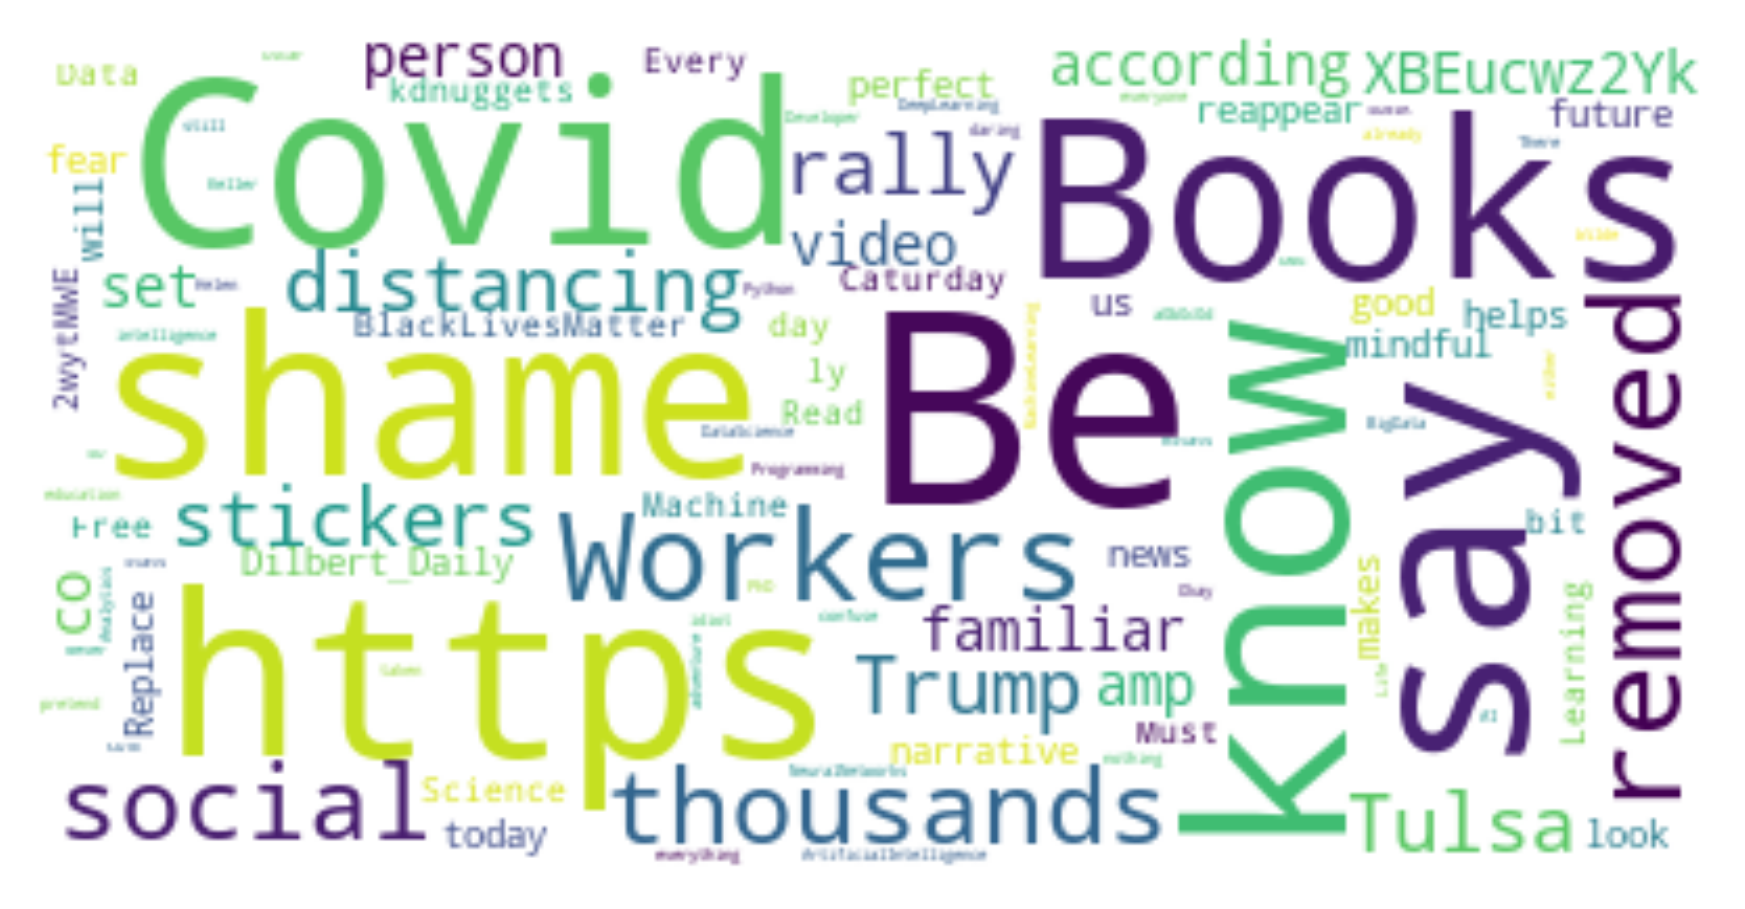

In [22]:
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let's clean up the data using the `re` python library to use regular expressions ("RegEx"). There is a useful guide on RegEx in Python here: https://www.w3schools.com/python/python_regex.asp

In [23]:
# replace all the mentions (e.g. @Dilbert_Daily) from the tweets with '@USER'
tweet_string = re.sub(r'@\w+','@USER ', tweet_string)

# view the first 200 elements of the string to check this worked as expected
tweet_string[0:200]

'Workers removed thousands of social distancing stickers before Trump’s Tulsa rally, according to video and a person familiar with the set-up https://t.co/XBEucwz2Yk?amp=1 @USER  Replace “makes us look'

In [24]:
# replace all the URLs with '_URL_'
tweet_string = re.sub(r'http\S+','_URL_ ', tweet_string)

# view the first 200 elements of the string to check this worked as expected
tweet_string[0:200]

'Workers removed thousands of social distancing stickers before Trump’s Tulsa rally, according to video and a person familiar with the set-up _URL_  @USER  Replace “makes us look good” with “helps the '

In [25]:
# convert the text to lower case so, for example, instead of having "Be" and "be" be included
# as 2 separate words, we'd only have "be"
tweet_string = tweet_string.lower()

# view the first 200 elements of the string to check this worked as expected
tweet_string[0:200]

'workers removed thousands of social distancing stickers before trump’s tulsa rally, according to video and a person familiar with the set-up _url_  @user  replace “makes us look good” with “helps the '

In [26]:
# remove extra white spaces so there is only one space between words
tweet_string = re.sub(r'\s+',' ', tweet_string)

# view the first 200 elements of the string to check this worked as expected
tweet_string[0:200]

'workers removed thousands of social distancing stickers before trump’s tulsa rally, according to video and a person familiar with the set-up _url_ @user replace “makes us look good” with “helps the na'

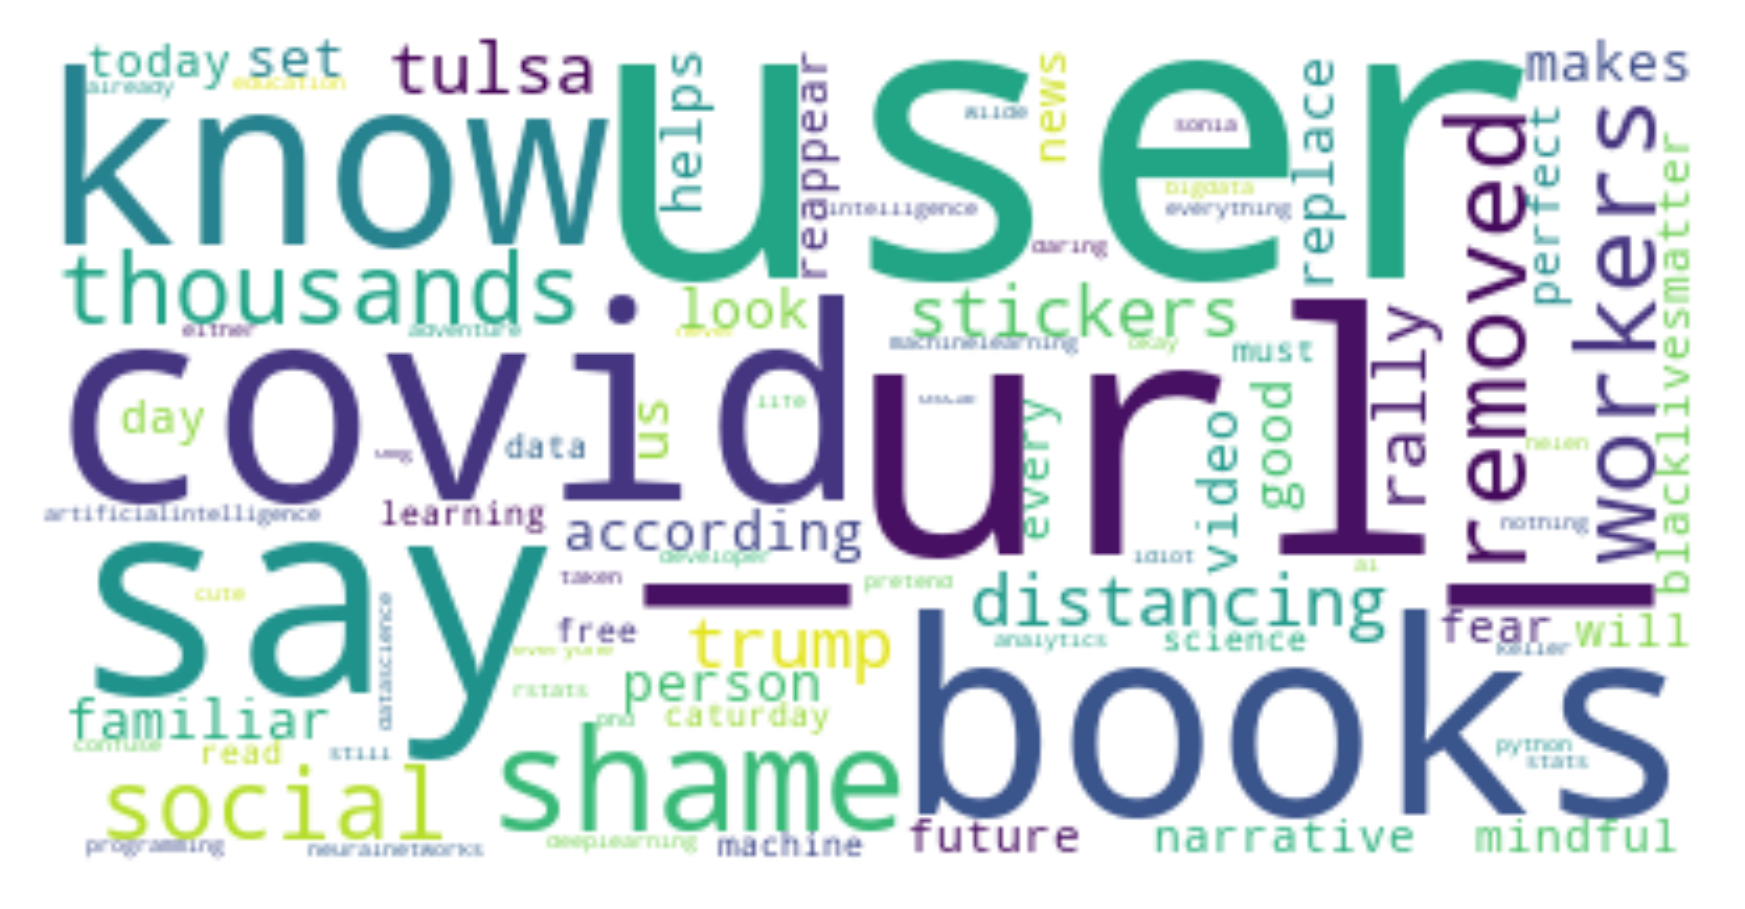

In [27]:
### view the wordcloud for this cleaned-up tweet string

# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

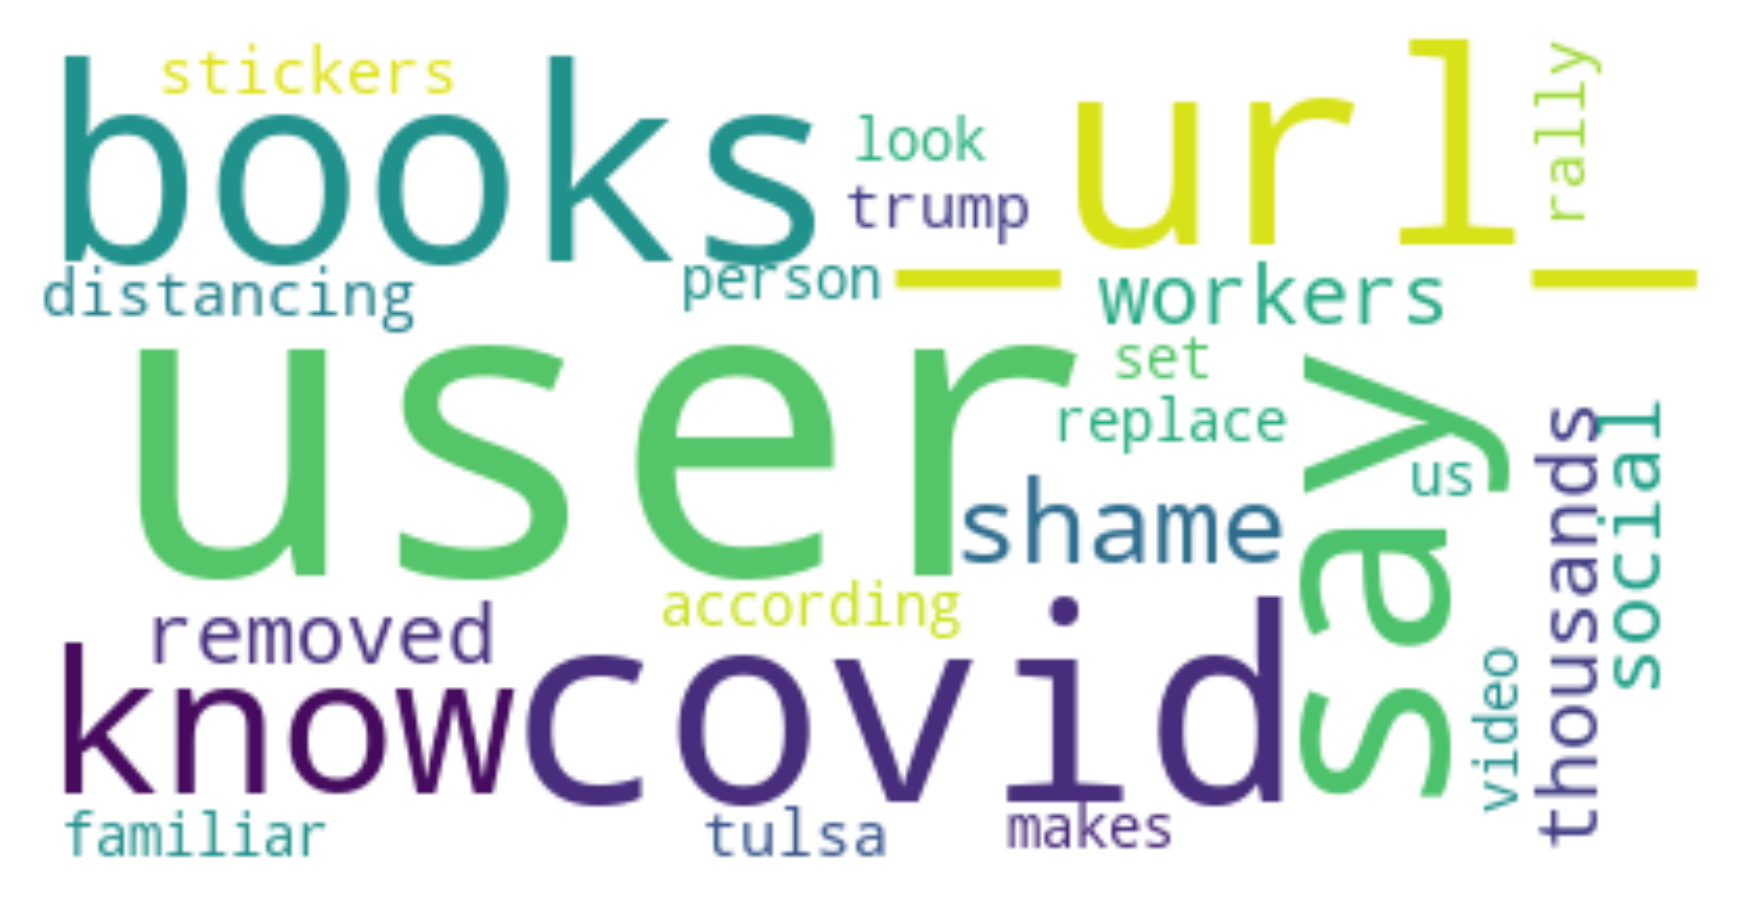

In [28]:
### lets change it so that the wordcloud only shows the top 25 words

# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=25, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
### tokenise the tweet string i.e. split the string up so that each word is a separate token (element in a list)
### using the spacy library


# create a spacy document by pointing spacy to the tweet string
tweet_doc = nlp(tweet_string)

# get all tokens that aren't punctuation
tweet_words = [token.text for token in tweet_doc if token.is_punct != True]

# get the frequency of each word (token) in the tweet string
tweet_word_freq = Counter(tweet_words)

# get the 5 most frequent words
five_most_common_words = tweet_word_freq.most_common(5)

# view the 5 most common words
five_most_common_words

[('and', 5), ('is', 5), ('to', 3), ('a', 3), ('with', 3)]

In [30]:
# create a Pandas dataframe containing the tokens (words) and their frequencies
freq_df = pd.DataFrame.from_dict(tweet_word_freq, orient='index').reset_index()

# rename the columns to "word" and "freq"
freq_df.columns=["word", "freq"]

# sort the dataframe so that the most frequent word is at the top and view the first 3 rows
freq_df.sort_values(by="freq", ascending=False).head(3)

,word,freq
15,and,5
34,is,5
19,with,3


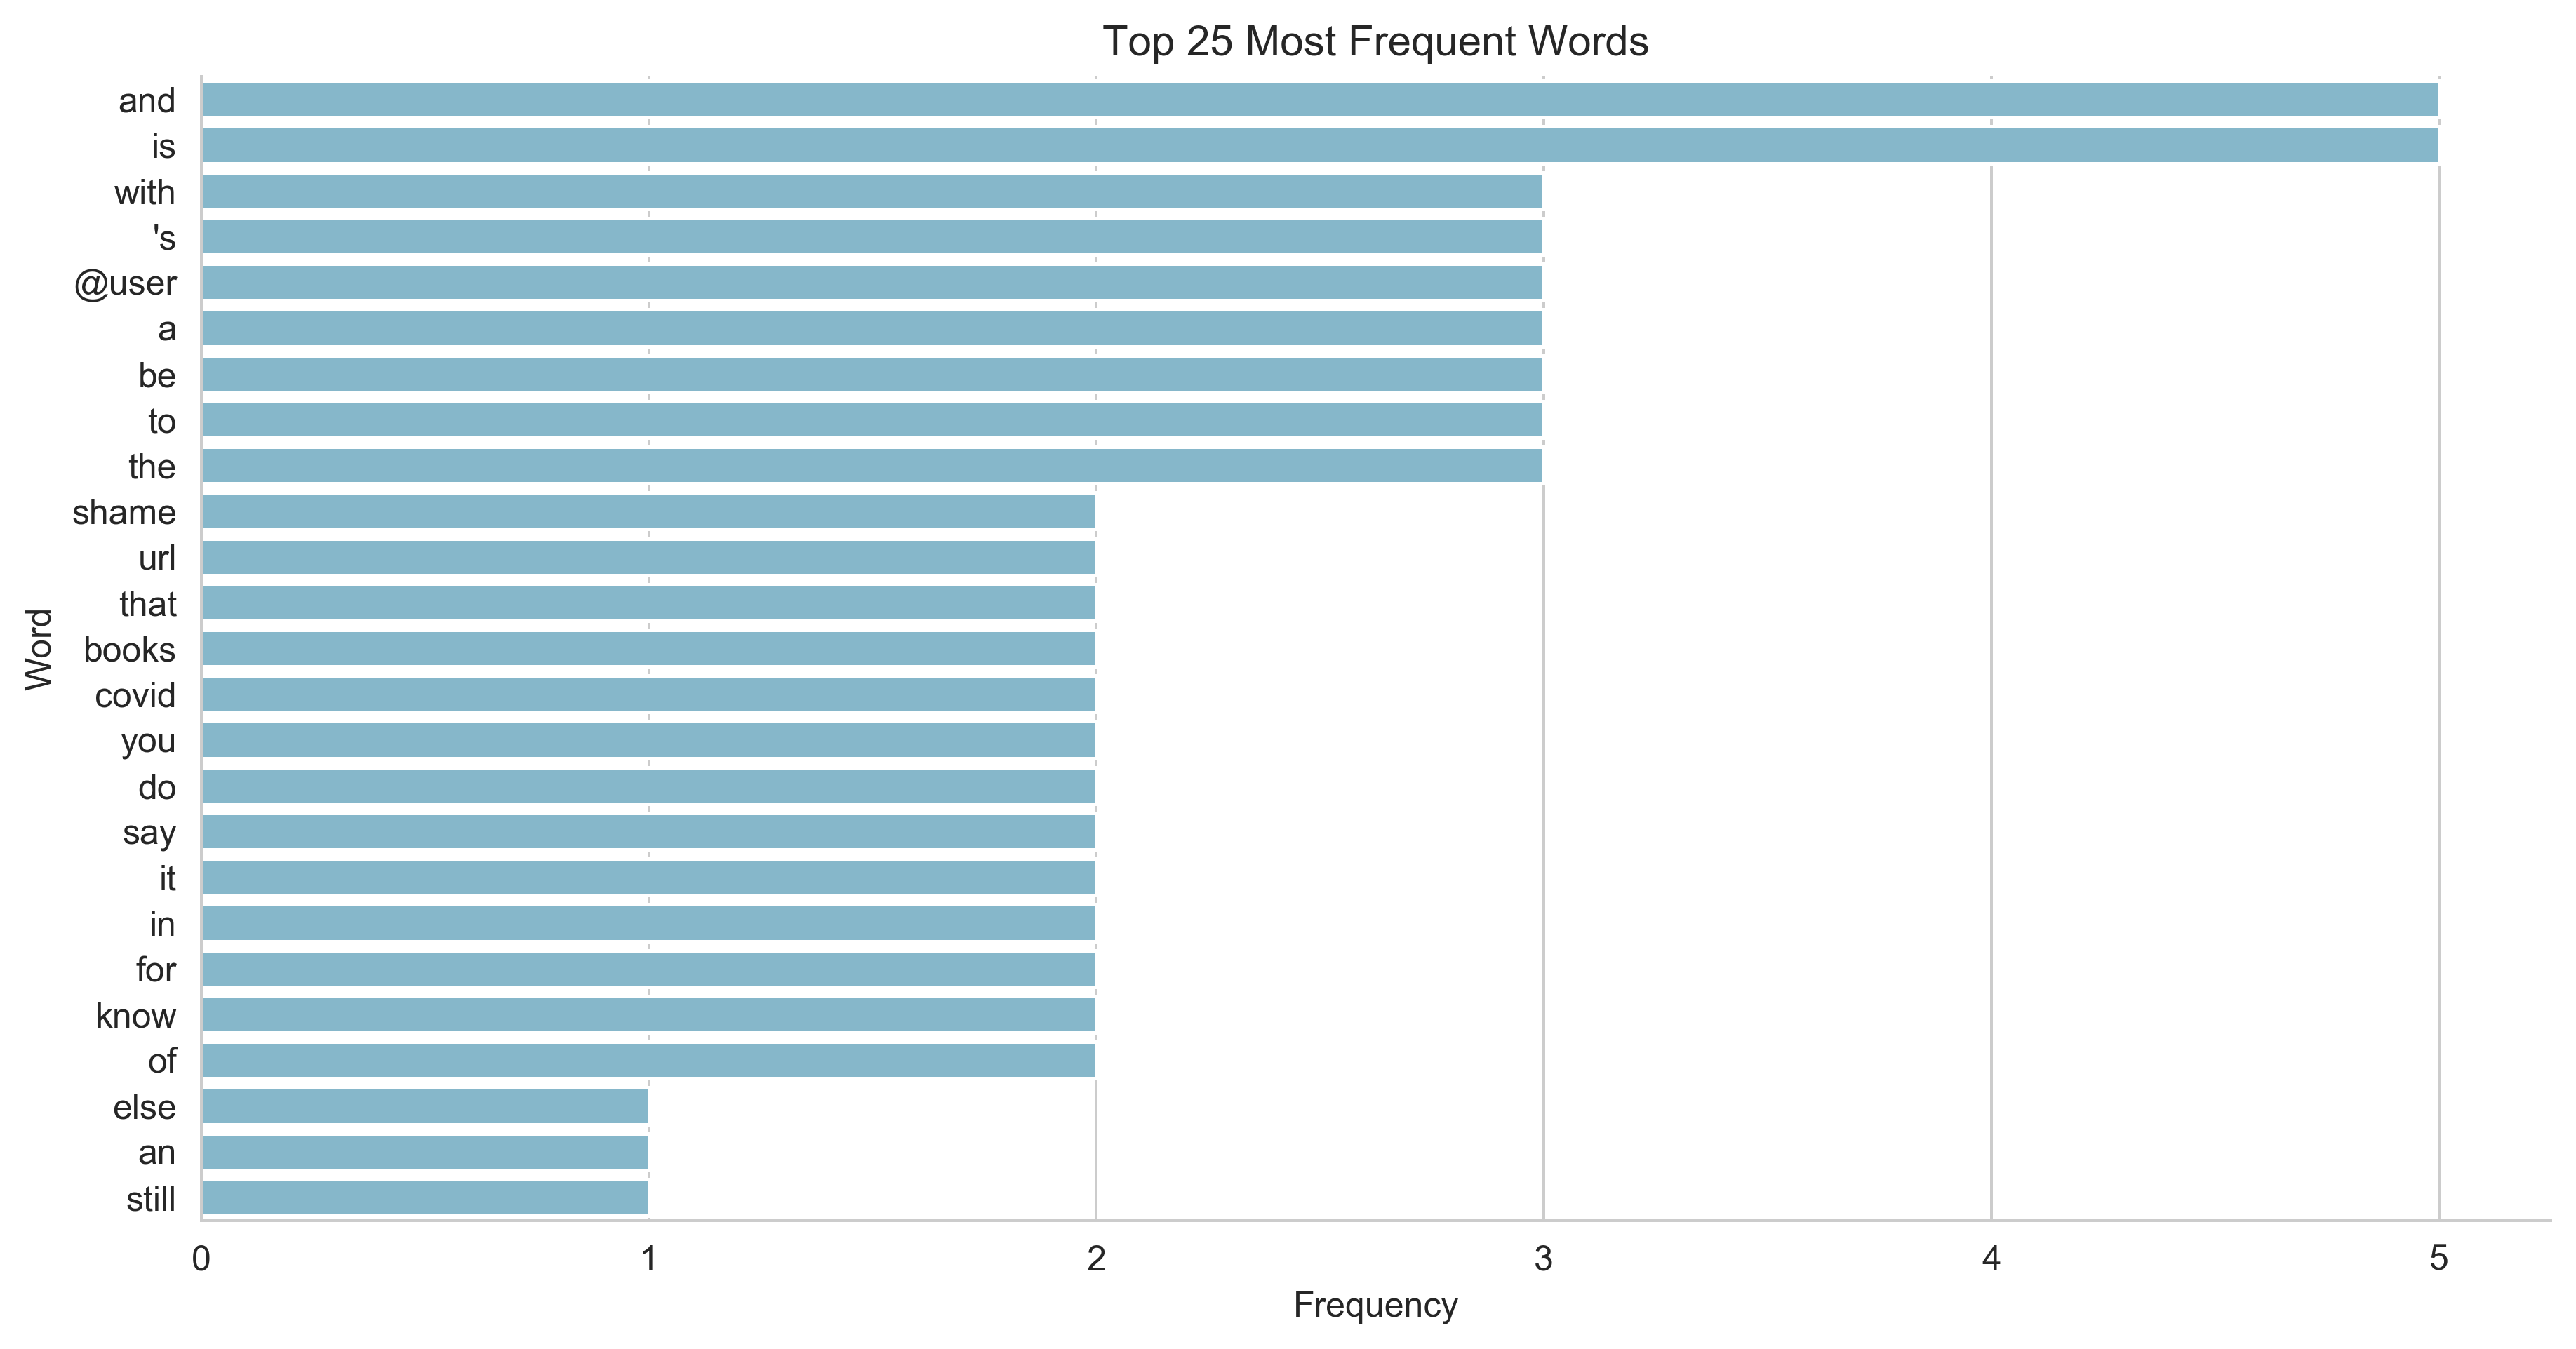

In [31]:
# display a bar chart showing the top 25 words and their frequencies
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=freq_df.sort_values(by="freq", ascending=False).head(25), 
            y="word", 
            x="freq", 
            color='#7bbcd5')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top 25 Most Frequent Words")
sns.despine();

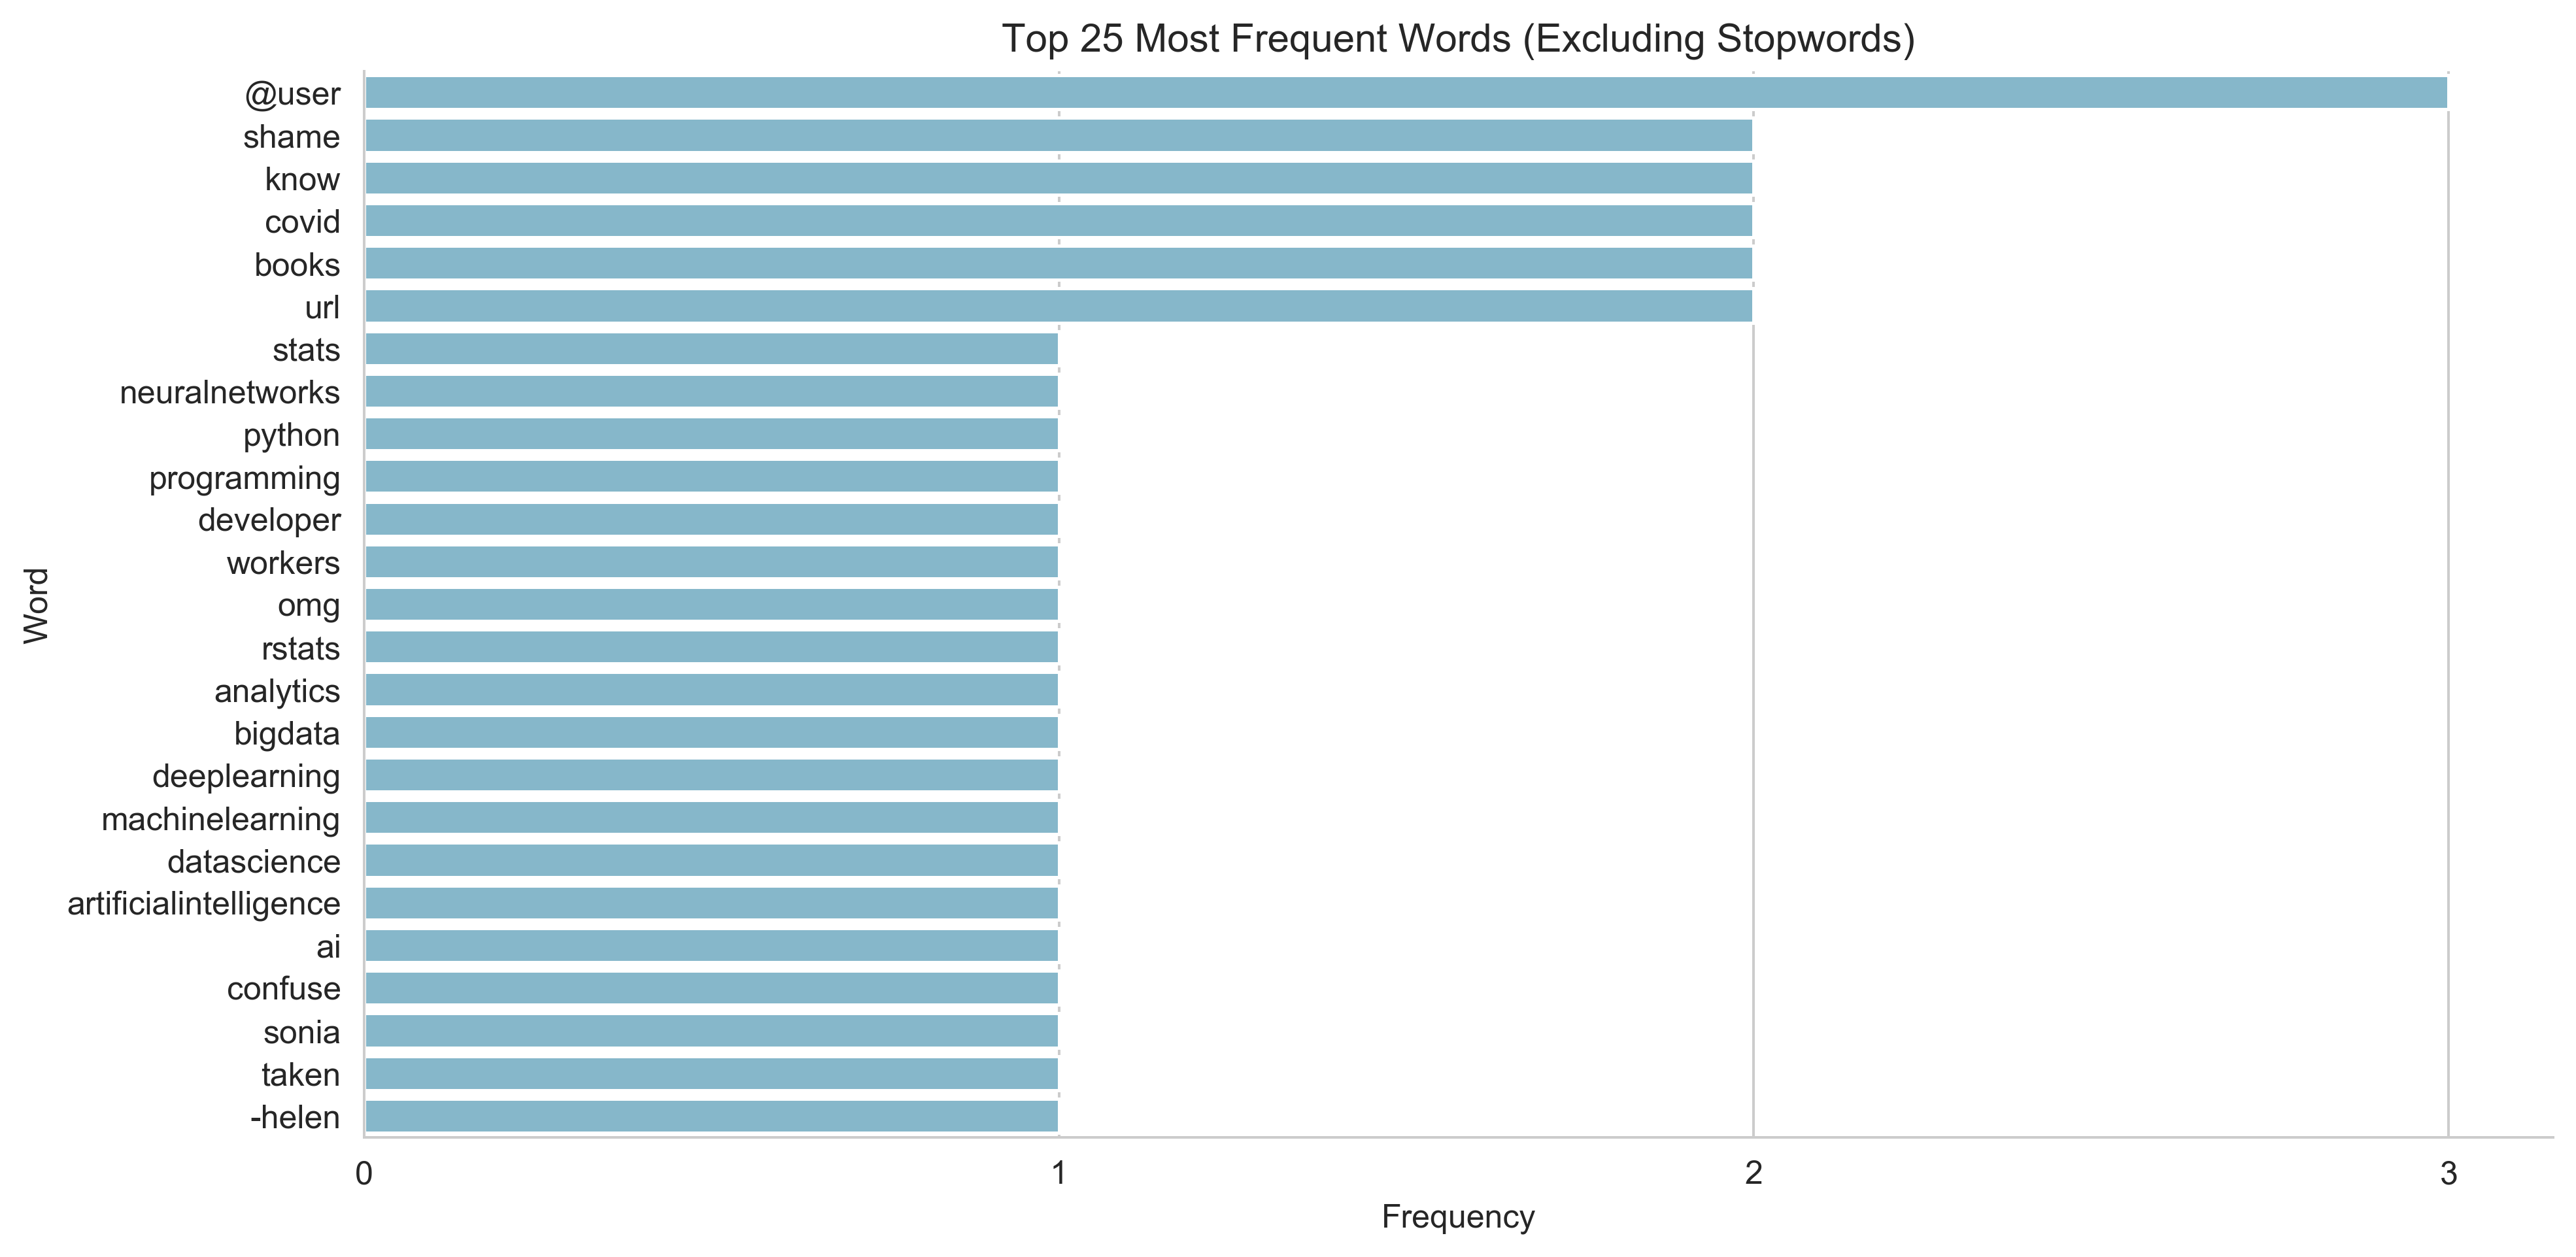

In [33]:
### let's remove words such as 'and', 'is' etc i.e. really commonly used words that
### don't give us an insight into the topics included in the text. These are known
### as "stopwords" in the NLP world. The spacy tokeniser lets us do this easily...

# get all tokens that aren't punctuation AND AREN'T STOPWORDS
tweet_words = [token.text for token in tweet_doc if token.is_punct != True and \
               token.is_stop != True]

# get the frequency of each word (token) in the tweet string
tweet_word_freq = Counter(tweet_words)

# refresh the Pandas dataframe containing the tokens (words) and their frequencies
freq_df = pd.DataFrame.from_dict(tweet_word_freq, orient='index').reset_index()

# rename the columns to "word" and "freq"
freq_df.columns=["word", "freq"]

# display a bar chart showing the top 25 words and their frequencies (which will exclude the stopwords this time)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=freq_df.sort_values(by="freq", ascending=False).head(25), 
            y="word", 
            x="freq", 
            color='#7bbcd5')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top 25 Most Frequent Words (Excluding Stopwords)")
plt.xticks([0,1,2,3])
sns.despine();